In [42]:
from IPython.display import HTML
from matplotlib import animation, rc
%matplotlib inline

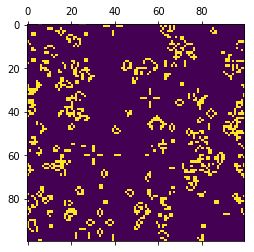

In [2]:
################################################################################
# conway.py
#
# Author: electronut.in
# 
# Description:
#
# A simple Python/matplotlib implementation of Conway's Game of Life.
################################################################################

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

N = 100
ON = 255
OFF = 0
vals = [ON, OFF]

# populate grid with random on/off - more off than on
grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def update(data):
  global grid
  # copy grid since we require 8 neighbors for calculation
  # and we go line by line 
  newGrid = grid.copy()
  for i in range(N):
    for j in range(N):
      # compute 8-neghbor sum 
      # using toroidal boundary conditions - x and y wrap around 
      # so that the simulaton takes place on a toroidal surface.
      total = (grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
               grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
               grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
               grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255
      # apply Conway's rules
      if grid[i, j]  == ON:
        if (total < 2) or (total > 3):
          newGrid[i, j] = OFF
      else:
        if total == 3:
          newGrid[i, j] = ON
  # update data
  mat.set_data(newGrid)
  grid = newGrid
  return [mat]

# set up animation
fig, ax = plt.subplots()
mat = ax.matshow(grid)
ani = animation.FuncAnimation(fig, update, interval=50,
                              save_count=50)
HTML(ani.to_html5_video())


In [7]:
from math import pi, cos, sin

In [8]:
# Constants
SAFE_ZONE = -1
PRED = 1
PREY = 2

In [9]:
# Create Eye Class
class Eye:
    def __init__(self, arclength):
        self.eye_arclength = arclength
        # Height of the triangle
        self.direction = 8
        self.width = 6
        self.area = (self.direction * self.width)/2

In [10]:
new_eye = Eye(pi/2)
assert new_eye.area == 24

In [11]:
# Create Grid
class Grid:
    def __init__(self):
        self.x_axis = 100
        self.y_axis = 100
    
    def print(self):
        print(grid)
    
    def valid_move(self, x, y):
        return(x > 0 and y > 0 and x + 1 <= self.x_axis and y + 1 <= self.y_axis)

A few problems to think about

How do I control where the eyes are located
How do I tell the direction the animal is facing
How do I allow the animal to move in relation to the direction its facing

Instead of doing a matrix format of the grid I'm going to do where the grid itself is just two numbers that represent the dimensions. The animal will operate in midpoints on movement.
Example:

Let location = [.5, .5]

If the animal moves left the value will be [1.5, .5]

The animal will also have a front point that will act to tell its direction.
The front point is an angle in relation to the x-axis.

Example:
Let front = PI
To calculate the front point we can then do cos(PI), sin(PI)

The eyes of the animal will be an arclength away from the front point.
Let front = PI
eye1_arclength = .5

Since the animal is essentially a unit circle:
front_arc_length = PI
eye1_arclength = PI + .5

Finding the point of the eye is then trivial
cos(eye1_arclength) + location[0], sin(eye1_arclength) + location[1]

Then looking is just a matter of building a triangle from the eye and finding if anything lies within it's area


The grid needs to know about all the animals so that it can tell when the game should be over. The grid is going to ask the animals for there location check and check for a winner at the end of each move

In [12]:
# Create Agent Action Class
class Animal:
    def __init__(self, Eye):
        self.location = [.5,.5]
        self.direction_angle = (3*pi)/2
        # Eye Arc Lengths
        self.eyes = [Eye(-(pi/2)), Eye(pi/2)]
        
    # Returns tuples of ordered pairs for the location of the eyes
    def calc_eyes(self):
        # Calculate the position for an eye and return a tuple of the coordinates
        def calc_eye(eye):
            x = cos(abs(self.direction_angle + self.eye[0])) + self.location[0]
            y = sin(abs(self.direction_angle + self.eye[0])) + self.location[1]
            return((x, y))
        return(list(map(calc_eye, [eyes.arc_length for eye in eyes])))
         
    # The animal is allowed to turn it's body in any direction
    def turn(self, angle):
        self.direction_angle = (self.direction_angle + angle) % (2*pi)

    # The animal is allowed to move 1 in any direction
    def move(self, grid, angle):
        x = cos(angle) + self.location[0]
        y = sin(angle) + self.location[1]
        if(grid.valid_move(x, y)):
            self.location[0] = x
            self.location[1] = y
            return True
        return False
    
#     # Look
#     def look():
#         for eye in calc_eyes():
            

In [13]:
# Tests
firstGrid = Grid()
pred = Animal(Eye)

# The animal turns correctly
pred.turn(pi)
assert pred.direction_angle == pi/2
# The animal moves correctly
pred.move(firstGrid, 2*pi)
assert pred.location[0] == cos(2*pi) + .5

In [14]:
# Sim Control
class simulation_control():
    def __init__(self, Grid, Animal):
        self.grid = Grid()
        self.animals = [Animal(), Animal()]
        # Set the iterations
        self.iterations = 500
    
    def turn(self, animal):
        
    
    def look(self, eye):
        eye.area
        for animal in self.animals:
            
            
        
    
    def start_sim():
        # Run the iterations
        for iteration in self.iterations:
            for animal in self.animals:
                self.turn(animal)
            
        

IndentationError: expected an indented block (<ipython-input-14-3ab1b4e0f241>, line 12)

In [1]:
sim_control = simulation_control(Grid, Animal)

NameError: name 'simulation_control' is not defined

In [11]:
# Create Predater Value Function

In [ ]:
# Create Prery Value Function